# PDCalibration d-spacing


In [1]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [10]:
import os, numpy as np
from mantid import simpleapi as msa, mtd

In [3]:
dvalues = [1.10860231, 1.24596143, 1.357755, 1.63751414, 1.92015553, 3.13560085]

In [7]:
signal = msa.Load('/SNS/SEQ/IPTS-19573/nexus/SEQ_130273.nxs.h5')

In [8]:
%%time
msa.PDCalibration(
    SignalWorkspace="signal",
    TofBinning=[300,-.001,16666.7],
    PeakPositions=dvalues,
    StartFromObservedPeakCentre=True,
    OutputCalibrationTable='new_cal',
    DiagnosticWorkspaces='cal_diag',
    CalibrationParameters='DIFC')

CPU times: user 2h 52min 22s, sys: 5min 43s, total: 2h 58min 6s
Wall time: 5min 56s


PDCalibration_returns(OutputCalibrationTable=TableWorkspace
Columns: 6
Rows: 115712
4 MB, DiagnosticWorkspaces=WorkspaceGroup
 -- cal_diag_dspacing
, MaskWorkspace=Title: 
Histograms: 115712
Masked: 9039
)

In [11]:
cal_diag = mtd['cal_diag']
cal_diag_d = cal_diag[0]
cal_diag_d.getColumnNames()

['detid',
 '@1.1086',
 '@1.246',
 '@1.3578',
 '@1.6375',
 '@1.9202',
 '@3.1356',
 'chisq',
 'normchisq']

In [13]:
d31356 = np.array(cal_diag_d.column('@3.1356'))
d31356[100455]

3.1356009137224281

In [14]:
%%time
ws = msa.Load(Filename="/SNS/SEQ/IPTS-19573/nexus/SEQ_130273.nxs.h5")

In [15]:
ws = msa.CropWorkspace(InputWorkspace=ws, XMin=300, XMax=16666.7)
I_d = msa.ConvertUnits(InputWorkspace=ws, Target='dSpacing', EMode='Elastic')
I_d = msa.Rebin(InputWorkspace=I_d, Params='0.4,-0.001,7')

In [16]:
I_d_100455 = msa.SumSpectra(InputWorkspace=I_d, StartWorkspaceIndex=100455, EndWorkspaceIndex=100455)

<IPython.core.display.Javascript object>


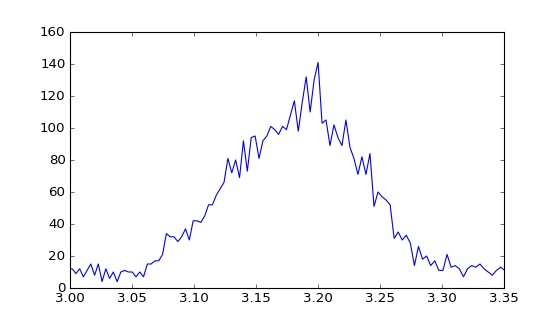

(3, 3.35)

In [20]:
plt.figure(figsize=(7,4))
Xbb = I_d_100455.readX(0)
plt.plot( (Xbb[:-1]+Xbb[1:])/2, I_d_100455.readY(0))
plt.xlim(3,3.35)